# Experiment 3
## Design a model to predict the housing price from Boston Dataset using Multivariate Linear Regression.

### Multivariate Linear Regression

Multivariate Linear Regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more independent (predictor) variables. It is an extension of simple linear regression, which considers only one predictor variable, to multiple predictor variables. The primary goal of Multivariate Linear Regression is to establish a linear relationship between the independent variables and the dependent variable, making it a valuable tool for various real-world applications, such as price prediction, sales forecasting, and scientific modeling.

#### Key Components:

1. **Dependent Variable (Y):** This is the variable we want to predict or explain. In Multivariate Linear Regression, there can be more than one dependent variable.

2. **Independent Variables (X1, X2, ... Xn):** These are the variables that are used to predict the dependent variable. There can be multiple independent variables, and they should be numeric in nature.

3. **Coefficients (β0, β1, ... βn):** These are the parameters or weights that the algorithm learns during training. They represent the effect of each independent variable on the dependent variable.

4. **Intercept (β0):** This is the coefficient that represents the value of the dependent variable when all the independent variables are zero. It accounts for the bias or offset in the relationship.

5. **Linear Equation:** The relationship between the dependent variable and the independent variables is represented by a linear equation:

   ```
   Y = β0 + β1*X1 + β2*X2 + ... + βn*Xn
   ```

6. **Residuals (Errors):** These are the differences between the actual values (Y) and the values predicted by the model. Minimizing the sum of squared residuals is the objective of Multivariate Linear Regression.

#### Steps in Multivariate Linear Regression:

1. **Data Collection:** Gather a dataset with both the dependent variable and one or more independent variables.

2. **Data Preprocessing:** Clean and preprocess the data, handling missing values and outliers. Convert categorical variables to numerical format if necessary.

3. **Data Splitting:** Split the dataset into training and testing sets to train and evaluate the model.

4. **Model Building:** Create a Linear Regression model and fit it to the training data. The model will learn the coefficients (β0, β1, ... βn) that minimize the error between predicted and actual values.

5. **Model Evaluation:** Assess the model's performance on the testing data using evaluation metrics such as Mean Squared Error (MSE), R-squared, or Root Mean Squared Error (RMSE).

6. **Visualization:** Visualize the model's predictions against actual values to gain insights into its accuracy and reliability.

7. **Model Tuning:** Fine-tune the model by adjusting hyperparameters or conducting feature engineering to improve its performance.

8. **Deployment:** Once satisfied with the model's performance, deploy it for making predictions in real-world scenarios.

Multivariate Linear Regression is a fundamental technique in the field of regression analysis and is often used as a baseline model in predictive modeling tasks. It assumes that there is a linear relationship between the independent variables and the dependent variable and seeks to quantify this relationship through the learned coefficients.

Mean Squared Error: 24.29
R-squared: 0.67


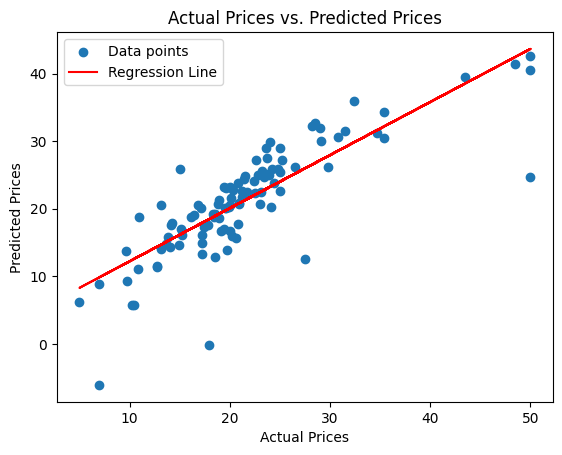

In [9]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load the Boston Housing Dataset
# URL of the original Boston Housing Prices dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Step 3: Create a DataFrame for the dataset
# Define feature_names if needed
feature_names = [f"Feature_{i}" for i in range(data.shape[1])]
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['PRICE'] = target

# Step 4: Split the data into training and testing sets
X = boston_df.drop('PRICE', axis=1)  # Features
y = boston_df['PRICE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set and evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 7: Visualize the model's predictions with a regression line
plt.scatter(y_test, y_pred, label='Data points')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")

# Add a regression line
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, regression_line[0] * y_test + regression_line[1], color='red', label='Regression Line')
plt.legend()

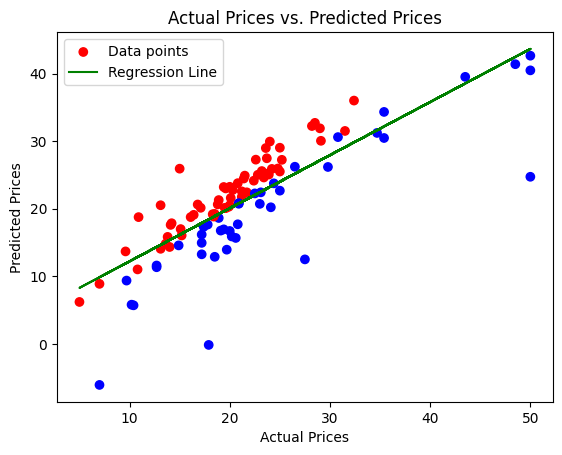

In [7]:
# Step 7: Visualize the model's predictions with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c=['blue' if actual > predicted else 'red' for actual, predicted in zip(y_test, y_pred)], label='Data points')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")

# Add a regression line
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, regression_line[0] * y_test + regression_line[1], color='green', label='Regression Line')

plt.legend()
plt.show()
